In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("salary.csv")
dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [3]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
age                0
company_change     0
type               0
dtype: int64

In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
age,30.0,34.266667,7.031620,21.0,29.00,34.0,37.75,56.0
company_change,30.0,0.400000,0.498273,0.0,0.00,0.0,1.00,1.0


In [5]:
dataset.corr()

,YearsExperience,Salary,age,company_change
YearsExperience,1.000000,0.978242,0.641433,-0.476989
Salary,0.978242,1.000000,0.656129,-0.552734
age,0.641433,0.656129,1.000000,-0.444854
company_change,-0.476989,-0.552734,-0.444854,1.000000


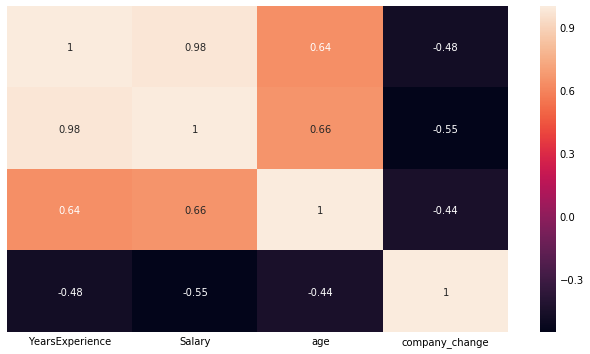

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),yticklabels=False,annot=True)

<Figure size 720x432 with 0 Axes>

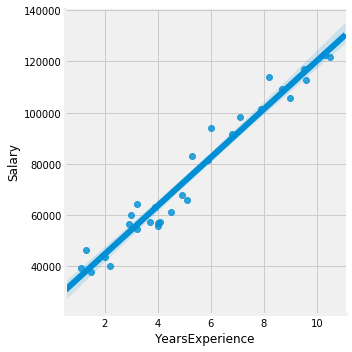

In [7]:
plt.figure(figsize=(10,6))
sns.lmplot(x="YearsExperience",y="Salary",data=dataset)

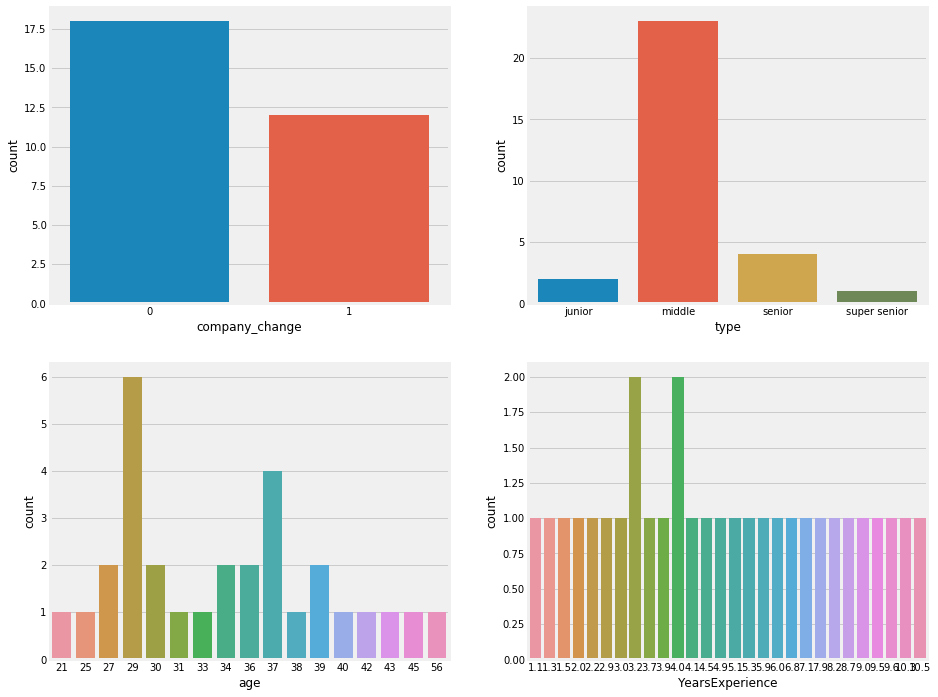

In [8]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.countplot(dataset["company_change"])
ax.add_subplot(2,2,2)
sns.countplot(dataset["type"])
ax.add_subplot(2,2,3)
sns.countplot(dataset["age"])
ax.add_subplot(2,2,4)
sns.countplot(dataset["YearsExperience"])

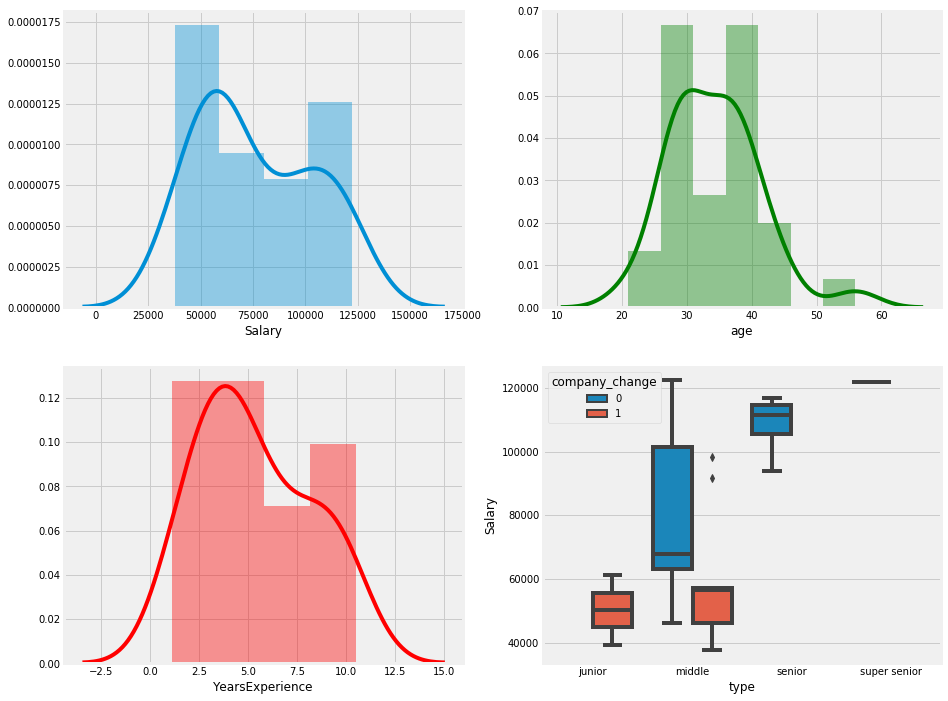

In [9]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.distplot(dataset["Salary"])
ax.add_subplot(2,2,2)
sns.distplot(dataset["age"],color="g")
ax.add_subplot(2,2,3)
sns.distplot(dataset["YearsExperience"],color="r")
ax.add_subplot(2,2,4)
sns.boxplot(x="type",y="Salary",data=dataset,hue="company_change")

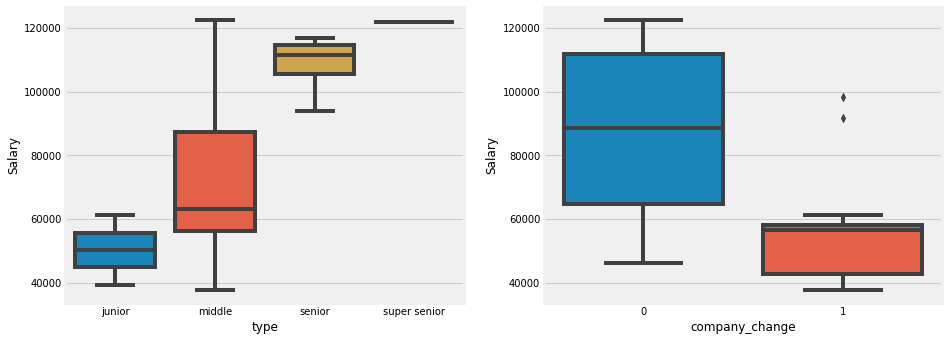

In [10]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.boxplot(x="type",y="Salary",data=dataset)
ax.add_subplot(2,2,2)
sns.boxplot(x="company_change",y="Salary",data=dataset)

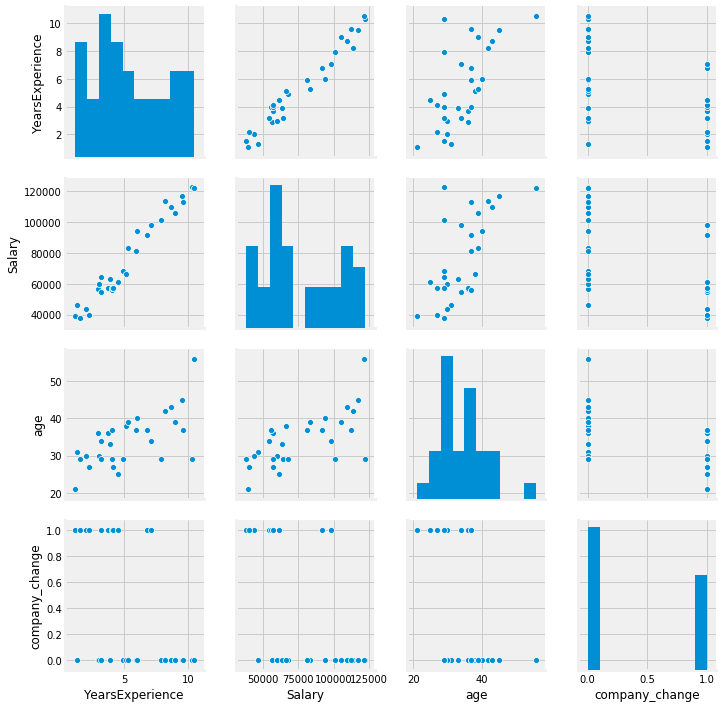

In [11]:
sns.pairplot(dataset)

In [12]:
def Standardscalar(data):
    return (data-stats["mean"])/stats["std"]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()
dataset["type"]=encoder.fit_transform(dataset["type"])

In [15]:
x=dataset.drop(["Salary"],axis=1)
y=dataset["Salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

# Normal equation

In [16]:
x_new_train=np.c_[np.ones((len(x_train),1)),x_train]
print(x_new_train)

[[ 1.   9.5 45.   0.   2. ]
 [ 1.   7.1 34.   1.   1. ]
 [ 1.  10.3 29.   0.   1. ]
 [ 1.   1.1 21.   1.   0. ]
 [ 1.   5.3 39.   0.   1. ]
 [ 1.   2.9 36.   0.   1. ]
 [ 1.   1.3 31.   0.   1. ]
 [ 1.   9.6 37.   0.   1. ]
 [ 1.   4.  29.   1.   1. ]
 [ 1.   6.8 37.   1.   1. ]
 [ 1.   6.  40.   0.   2. ]
 [ 1.   8.7 43.   0.   2. ]
 [ 1.   3.2 34.   1.   1. ]
 [ 1.   2.2 27.   1.   1. ]
 [ 1.   3.2 29.   0.   1. ]
 [ 1.   3.7 36.   1.   1. ]
 [ 1.   5.1 38.   0.   1. ]
 [ 1.   7.9 29.   0.   1. ]
 [ 1.   3.  30.   0.   1. ]
 [ 1.   4.9 29.   0.   1. ]
 [ 1.   4.5 25.   1.   0. ]
 [ 1.   2.  30.   1.   1. ]]


In [17]:
weigts_and_intercept=np.linalg.inv(x_new_train.T.dot(x_new_train)).dot(x_new_train.T).dot(y_train)

In [18]:
weigts_and_intercept

array([ 2.79118237e+04,  8.76302926e+03,  1.09051410e+01, -4.20716543e+03,
        3.27887992e+03])

In [19]:
weights=weigts_and_intercept[1:]
intercept=weigts_and_intercept[0:1]

In [20]:
x_new_test=np.c_[np.ones((len(x_test),1)),x_test]
y_pred_n=x_new_test.dot(weigts_and_intercept)

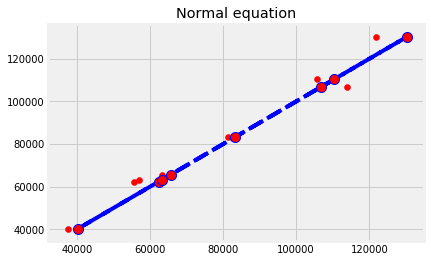

In [21]:
plt.plot(y_pred_n,y_pred_n,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(y_test,y_pred_n,marker='o',color='red')
plt.title("Normal equation")
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [23]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred_n),
                     np.sqrt(mean_squared_error(y_test,y_pred_n)),
                    mean_absolute_error(y_test,y_pred_n),
                    explained_variance_score(y_test,y_pred_n)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,3.058884e+07,5530.717575,5044.139287,0.976487
